In [1]:
#importing libraries such as pandas, numpy and matploylib, seaborn for the visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading our cleaned_releases_water csv file to use
df = pd.read_csv('cleaned_releases_Water.csv')

In [3]:
#checking if there is still any missing values but we already cleaned in our old file

df.columns

Index(['Reporting_Year', 'NPRI_ID', 'Company_Name', 'NAICS', 'NAICS Title',
       'PROVINCE', 'Latitude', 'Longitude', 'CAS_Number',
       'Substance Name (English)', 'Estimation_Method',
       'Total Release to Water'],
      dtype='object')

In [4]:
#checking if there is still any missing values but we already cleaned in our old file
df.isnull().sum()

,0
Reporting_Year,0
NPRI_ID,0
Company_Name,0
NAICS,0
NAICS Title,0
PROVINCE,0
Latitude,0
Longitude,0
CAS_Number,0
Substance Name (English),0


In [5]:
# Selecting only numerical columns (float64 and int64 types) from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating the first quartile (Q1) - 25th percentile for each numerical column
Q1 = df[numerical_columns].quantile(0.25)

# Calculating the third quartile (Q3) - 75th percentile for each numerical column
Q3 = df[numerical_columns].quantile(0.75)

# Computing the Interquartile Range (IQR), which is the range between Q3 and Q1
IQR = Q3 - Q1

# Defining the lower bound for detecting outliers (1.5 * IQR below Q1)
lower_bound = Q1 - 1.5 * IQR

# Defining the upper bound for detecting outliers (1.5 * IQR above Q3)
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers by checking if values are outside the lower or upper bounds
outliers = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)

# Counting the number of outliers per column
outliers_count = outliers.sum()

# Printing the number of outliers detected in each numerical column
print("Number of outliers per column:")
print(outliers_count)



Number of outliers per column:
Reporting_Year               0
NPRI_ID                   2579
NAICS                      394
Latitude                  1781
Longitude                   52
Total Release to Water    9191
dtype: int64


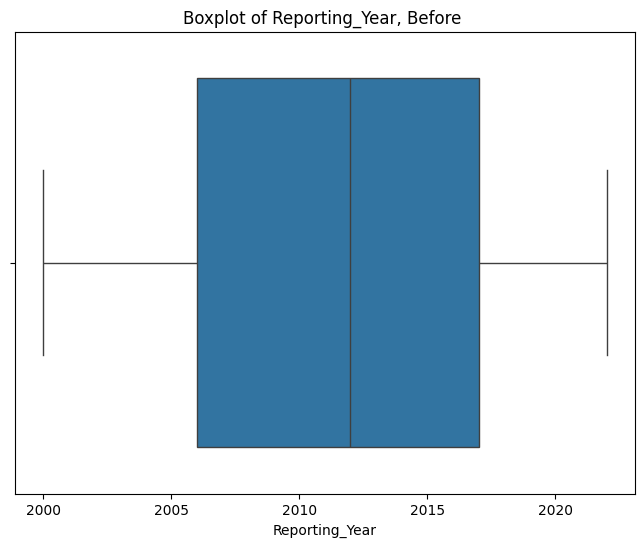

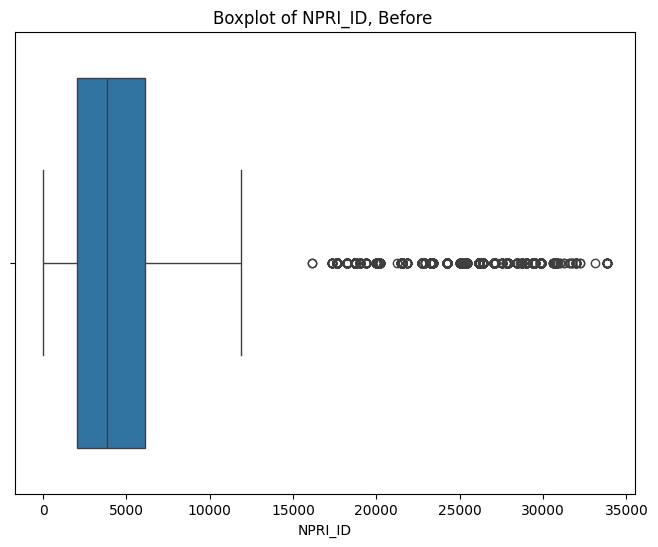

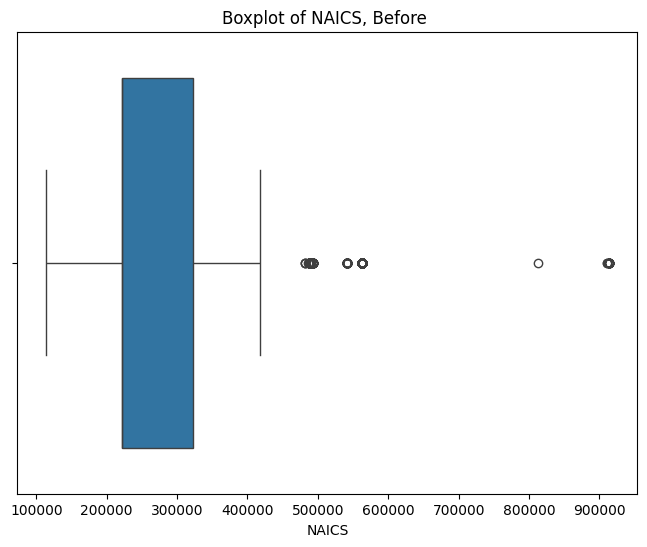

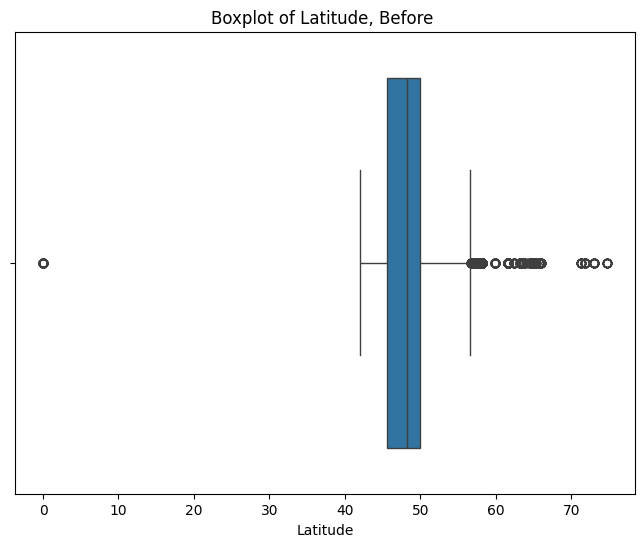

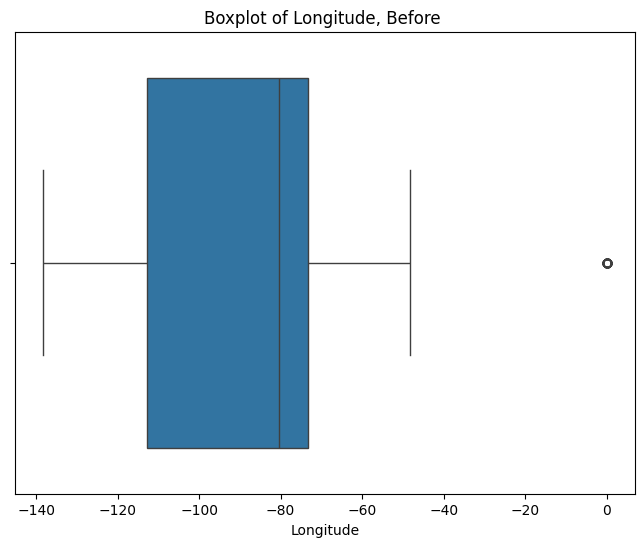

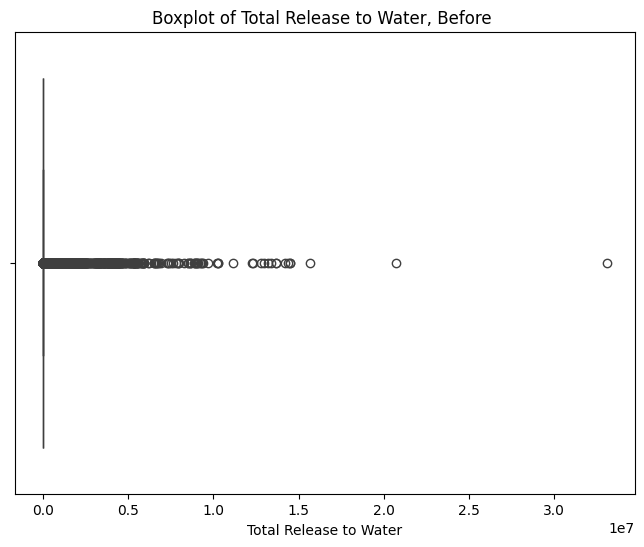

In [6]:
# Generating a boxplot for the current column to visualize its distribution and outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}, Before ')
    plt.show()

In [7]:
# Capping outliers at the upper and lower bounds
for col in numerical_columns:
    # If a value is greater than the upper bound, replace it with the upper bound.
    # If a value is less than the lower bound, replace it with the lower bound.
    # Otherwise, keep the original value.
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col],
                       np.where(df[col] < lower_bound[col], lower_bound[col], df[col]))

    print("Outliers have been capped.")


Outliers have been capped.
Outliers have been capped.
Outliers have been capped.
Outliers have been capped.
Outliers have been capped.
Outliers have been capped.


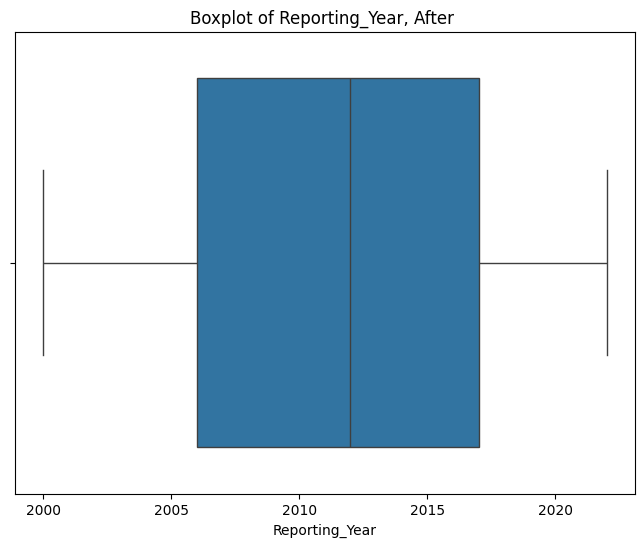

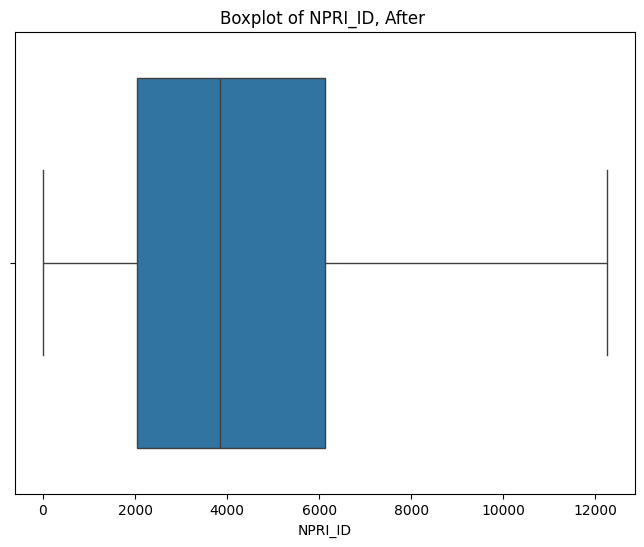

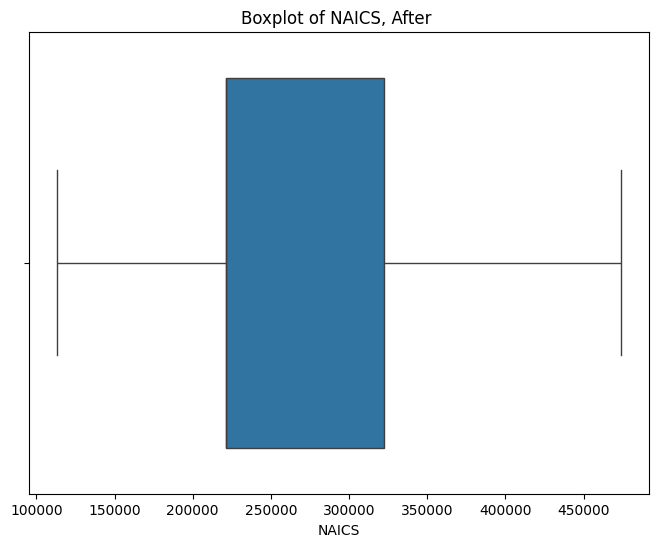

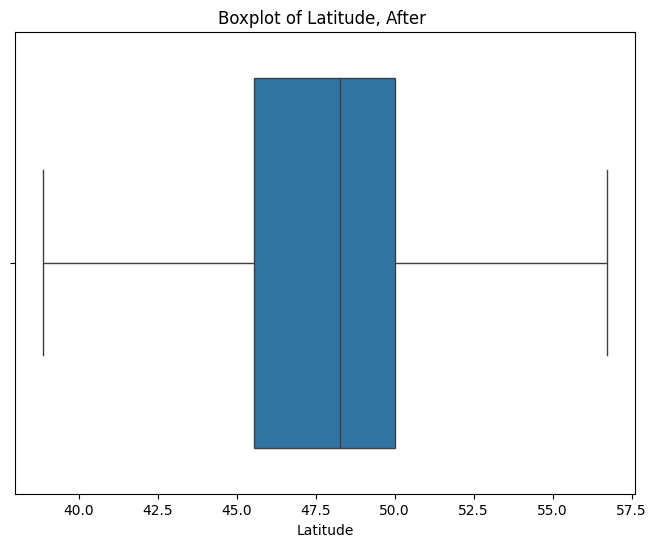

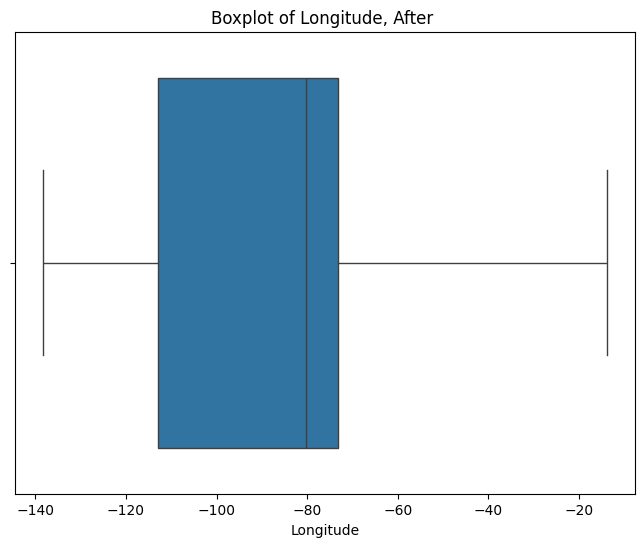

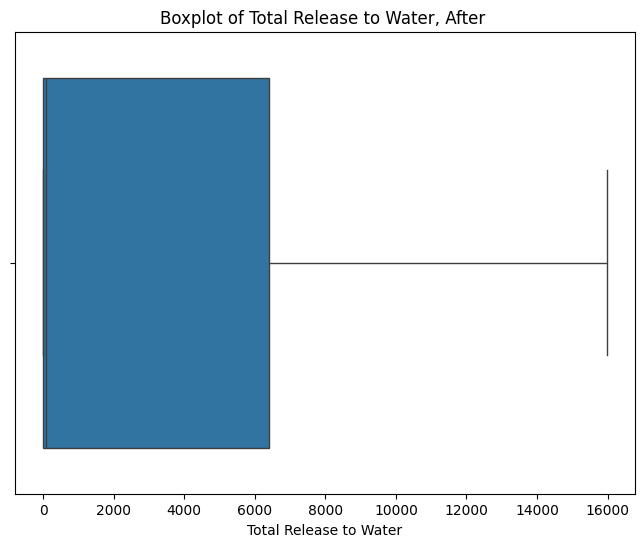

In [8]:
# Generating a boxplot for the current column to visualize its distribution after removing outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}, After ')
    plt.show()

In [9]:
#saving the new csv file after removing outliers
df.to_csv("After Removing Outliers Water.csv", index=False)

The graph shows the total water releases for the top 10 provinces in Canada. Here’s a brief explanation:

Ontario (ON) has the highest release, slightly above 60 million units.

Quebec (QC) follows with releases slightly above 50 million units.

British Columbia (BC) has releases slightly above 30 million units.

Alberta (AB) has releases slightly above 10 million units.

New Brunswick (NB), Newfoundland and Labrador (NL), Manitoba (MB), Nova Scotia (NS), and Saskatchewan (SK) all have releases slightly below 10 million units.

Prince Edward Island (PE) has the lowest release, significantly below 10 million units.
Understanding these differences helps identify which provinces may benefit most from targeted pollution control measures, and can help predict which province will see the largest decrease in substance releases over the next five years.

<ipython-input-11-d7cd21e0fb90>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_provinces.index, y=top_provinces.values, palette="viridis")


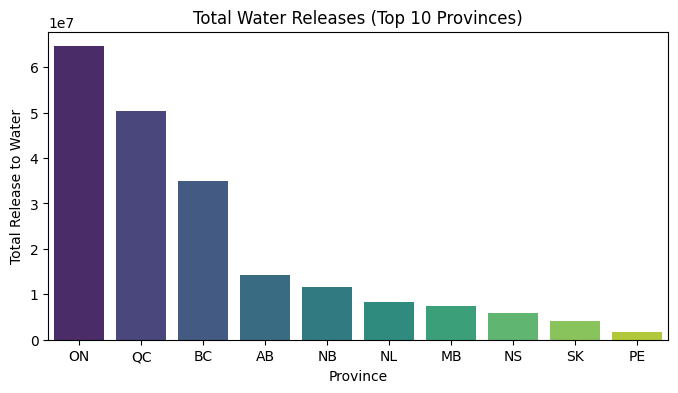

In [ ]:
# Get the top 10 provinces by total Land release
top_provinces = df.groupby("PROVINCE")["Total Release to Water"].sum().nlargest(10)

# Bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=top_provinces.index, y=top_provinces.values, palette="viridis")

# Labels and title
plt.title("Total Water Releases (Top 10 Provinces)")
plt.xlabel("Province")
plt.ylabel("Total Release to Water")

plt.show()


The graph shows the total water releases per year from 2000 to 2022. The y-axis represents the releases in units of 10 million, while the x-axis represents the years. The graph indicates an increase in releases from 2000 to 2002, followed by a stable period from 2003 to 2014. There is a slight decline in releases from 2015 to 2022, with some fluctuations.
Your project predicts which province will have the largest decrease in releases. This decline after 2014 suggests ongoing reductions. Analyzing province-wise trends and applying forecasting models can help identify the province with the steepest future decline.

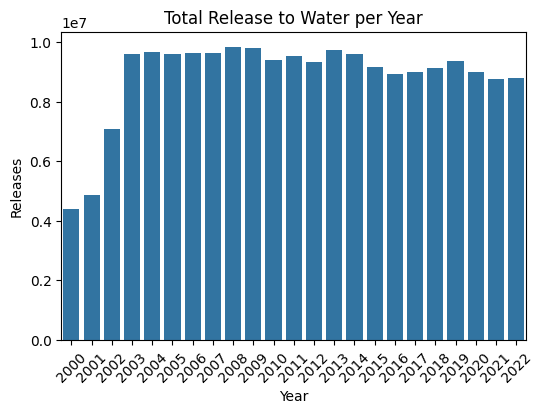

In [ ]:
df_grouped = df.groupby('Reporting_Year')['Total Release to Water'].sum().reset_index()
df_grouped['Reporting_Year'] = df_grouped['Reporting_Year'].astype(int)  # Convert to integer

plt.figure(figsize=(6,4))
sns.barplot(x='Reporting_Year', y='Total Release to Water', data=df_grouped)
plt.title('Total Release to Water per Year')
plt.xlabel('Year')
plt.ylabel('Releases')
plt.xticks(rotation=45)
plt.show()


This heatmap visualizes water emissions by province from 2000 to 2022. The color intensity represents emission levels:

Red shades indicate high emissions.
Blue shades indicate low emissions.
Some provinces had high emissions in earlier years but later show a reduction (fading from red to blue).
Gaps (white spaces) may indicate missing data or no reported emissions and provinces contributing the most to air pollution.
Your project predicts which province will see the largest decrease in emissions. This heatmap helps identify provinces with significant reductions, guiding future predictions. Provinces transitioning from red to blue are likely candidates for the biggest decrease.

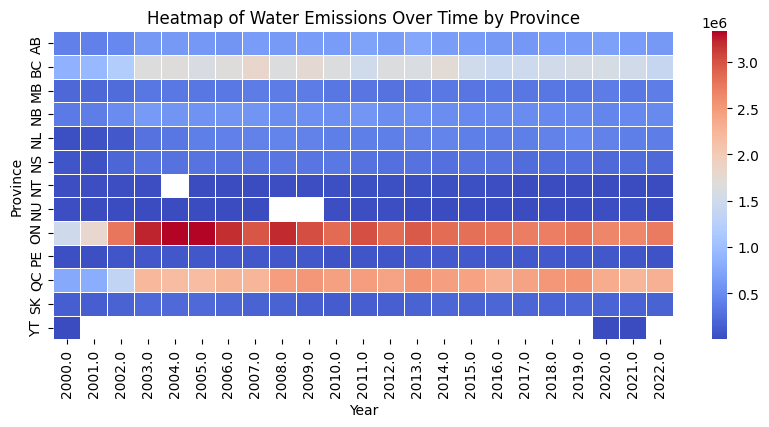

In [ ]:
pivot_df = df.pivot_table(values="Total Release to Water", index="PROVINCE", columns="Reporting_Year", aggfunc="sum")

plt.figure(figsize=(10, 4))
sns.heatmap(pivot_df, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Heatmap of Water Emissions Over Time by Province")
plt.xlabel("Year")
plt.ylabel("Province")
plt.show()



This line chart illustrates the water pollution trends over time (2000–2023) for the five lowest-emission provinces (NT, NU, PE, SK, YT). The y-axis represents total water emissions, while the x-axis represents the year.

SK (red) has the highest emissions among these provinces, peaking around 2005 before declining and fluctuating.
PE (green) shows a steady emission trend with some fluctuations but remains significantly lower than SK.
NT (blue) and NU (orange) display low but fluctuating emissions, with occasional increases and drops.
YT (purple) consistently has almost negligible emissions, indicating minimal industrial pollution.
Relevance to Your Problem
This graph is useful for predicting future emission trends, which aligns with your project’s goal of forecasting which province will see the largest decrease in water pollution over the next five years. It helps identify historical patterns and informs whether certain provinces are on a steady decline or remain stagnant in reducing emissions.

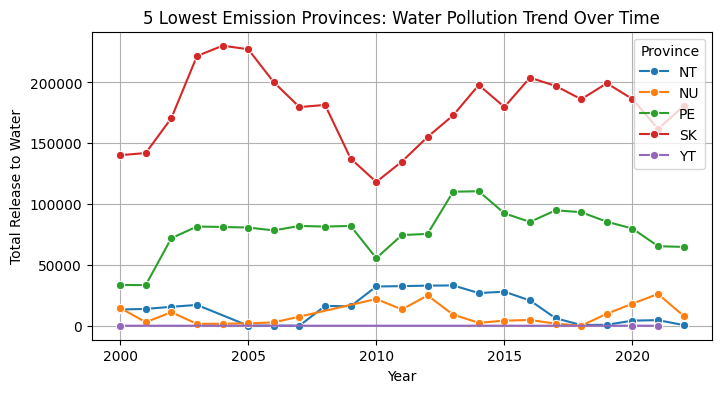

In [ ]:
province_trend = df.groupby(["PROVINCE", "Reporting_Year"])["Total Release to Water"].sum().reset_index()

# Get Bottom 5 provinces with lowest  emissions
bottom_5_provinces = province_trend.groupby("PROVINCE")["Total Release to Water"].sum().nsmallest(5).index

# Filter data for only the top 5 provinces
df_bottom_5 = province_trend[province_trend["PROVINCE"].isin(bottom_5_provinces)]

# Plot the trend
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_bottom_5, x="Reporting_Year", y="Total Release to Water", hue="PROVINCE", marker="o")

# Formatting
plt.title("5 Lowest Emission Provinces: Water Pollution Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Total Release to Water")
plt.legend(title="Province")
plt.grid(True)
plt.show()


The Regional Municipality of Niagara has the highest total release to water, exceeding 5 million units.
Other major contributors include Greater Vancouver Sewerage and Drainage District, Domtar Inc., and City of Toronto, with releases between 3M–5M units.
Municipal water agencies and industrial companies (e.g., paper and forestry industries) are among the top polluters.
it helps identify major polluters, track trends, and predict which provinces might see the largest decrease in emissions over five years.

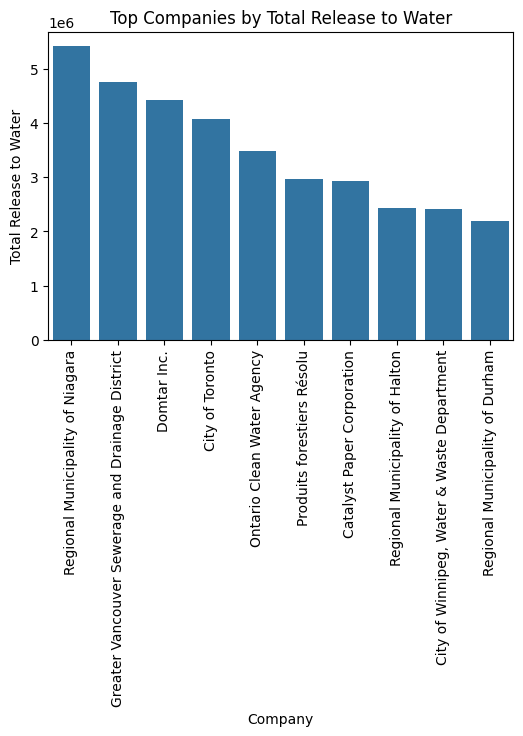

In [ ]:
top_companies = df.groupby('Company_Name')['Total Release to Water'].sum().reset_index().sort_values(by='Total Release to Water', ascending=False).head(10)

plt.figure(figsize=(6,4))
sns.barplot(x='Company_Name', y='Total Release to Water', data=top_companies)
plt.title('Top Companies by Total Release to Water')
plt.xlabel('Company')
plt.ylabel('Total Release to Water')
plt.xticks(rotation=90)
plt.show()



Shows correlations between key variables.
Total Release to Water has weak correlations with other features.
Latitude and Longitude show a strong negative correlation (-0.61), indicating geographical patterns.
NAICS (Industry Code) has a moderate negative correlation with NPRI_ID (-0.41), suggesting industry classification differences impact reporting.
Relevance: Helps determine which features influence pollution trends, aiding in predictive modeling for emissions reduction over five years.

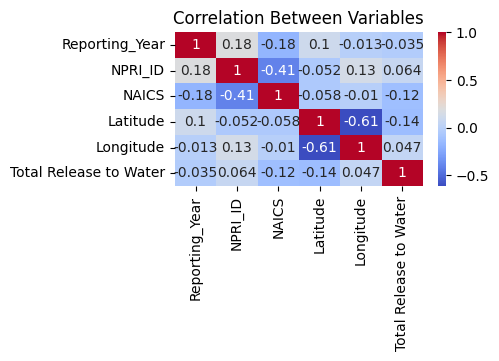

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(4,2))
sns.heatmap(numerical_df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Between Variables")
plt.show()

Shows the most common pollutants released into water.
Ammonia (38.5%) and Nitrate ions (29.4%) are the largest contributors.
Phosphorus (20.2%) and Manganese (9.3%) also have notable shares.
Methanol (2.6%) is the least common.
Relevance: Helps identify key pollutants for predicting future reductions and assessing which industries contribute the most to water contamination. This is crucial for targeted environmental policies and emission control strategies.

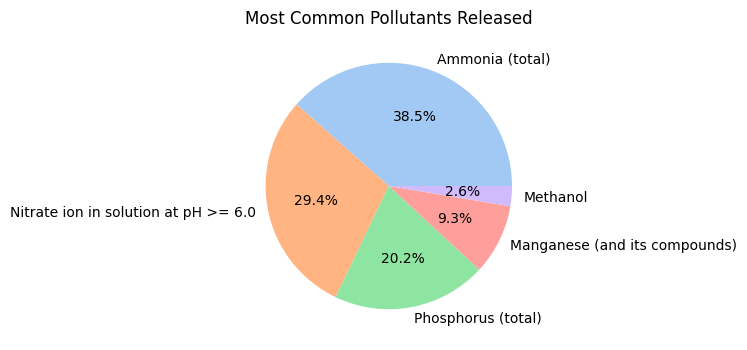

In [ ]:
# Group by pollutant and sum emissions
top_pollutants = df.groupby('Substance Name (English)')['Total Release to Water'].sum().reset_index()

# Get the top 5
top_pollutants = top_pollutants.sort_values(by='Total Release to Water', ascending=False).head(5)

# Plot
plt.figure(figsize=(4,4))
plt.pie(top_pollutants['Total Release to Water'], labels=top_pollutants['Substance Name (English)'], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Most Common Pollutants Released")
plt.show()


Shows the geographic distribution of water pollution in Canada using a scatter plot.
Each point represents a pollution site, with latitude and longitude marking locations.
Color intensity and size indicate the total release of pollutants into water.
Darker and larger circles signify higher pollution levels.
Clusters in certain areas suggest pollution hotspots, likely near industrial zones.
Relevance:

Helps identify provinces with significant water pollution.
Supports the prediction of which regions might see a decline in pollutant releases.
Aids in understanding geographical trends, crucial for targeting mitigation efforts.

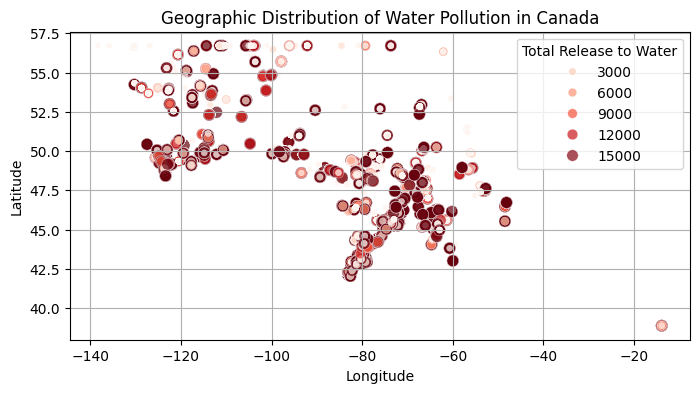

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    size="Total Release to Water",
    hue="Total Release to Water",
    palette="Reds",  # Red color for pollution hotspots
    alpha=0.7
)

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Water Pollution in Canada")
plt.grid(True)

# Show plot
plt.show()

Both graphs illustrate the relationship between estimation methods and total reported pollution (either general pollution or specifically water pollution). The x-axis represents different estimation methods used to measure pollution levels, while the y-axis represents the total reported release. Some estimation methods, such as "NA - Not Applicable," show significantly higher reported pollution values, while others remain lower and more consistent.

Relevance to the Problem:
Since your project focuses on predicting which province will have the largest decrease in substance releases (air, water, and/or land) in the next five years, understanding estimation methods is crucial. The variations in reported pollution based on different estimation techniques indicate potential biases or inconsistencies in measurement.

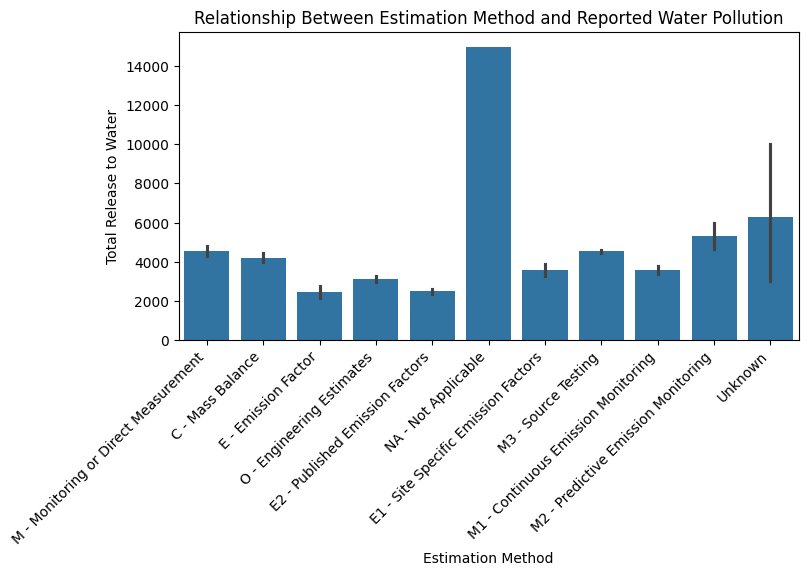

In [ ]:
plt.figure(figsize=(8, 4))

# Create a boxplot
sns.barplot(data=df, x='Estimation_Method', y='Total Release to Water')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set titles and labels
plt.title('Relationship Between Estimation Method and Reported Water Pollution')
plt.xlabel('Estimation Method')
plt.ylabel('Total Release to Water')

# Display the plot
plt.show()

This bar chart displays the top 10 polluting industries based on NAICS codes, ranked by total water pollution releases. Each bar represents a different industry, with colors differentiating the industry types. The Sewage Treatment Facilities (NAICS 221320.0) category shows the highest total release to water, significantly exceeding other industries.

Relevance to Your Problem:
Since your project focuses on predicting future reductions in pollution across provinces, identifying major polluting industries helps refine the model. Industries with historically high pollution levels (like sewage treatment, pulp mills, and mining) are key contributors to environmental impact. Understanding these sectors' pollution trends allows better forecasting of reductions, particularly if regulatory actions or industry shifts are expected in the next five years.

#

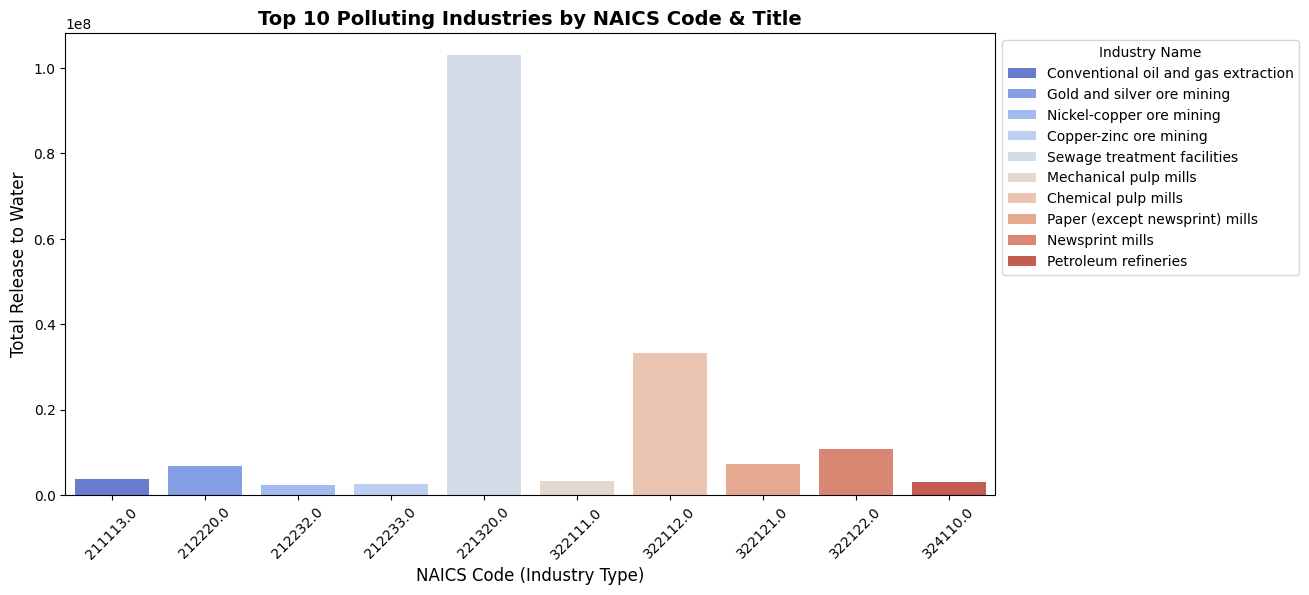

In [ ]:


# Aggregate total pollution by NAICS Code & NAICS Title
industry_pollution = df.groupby(['NAICS', 'NAICS Title'])['Total Release to Water'].sum().reset_index()

# Sort industries by total pollution (Top 10)
industry_pollution = industry_pollution.sort_values(by='Total Release to Water', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=industry_pollution, x='NAICS', y='Total Release to Water', hue='NAICS Title', dodge=False, palette='coolwarm')

# Labels and title
plt.title("Top 10 Polluting Industries by NAICS Code & Title", fontsize=14, fontweight='bold')
plt.xlabel("NAICS Code (Industry Type)", fontsize=12)
plt.ylabel("Total Release to Water", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.legend(title="Industry Name", bbox_to_anchor=(1, 1), loc='upper left')  # Move legend outside

plt.show()



Visuals for substances


The bar chart shows the top 15 substances with the highest total water release, with Ammonia, Nitrate ion, and Phosphorus being the most released pollutants. These substances are key contributors to water pollution, mainly from industrial and agricultural activities.

Relevance to Your Problem:
Helps identify which pollutants to monitor for reductions.
Supports province-wise trend analysis to predict where emissions will decrease.
Aids in feature selection for your machine learning models.
Connects with industry contributions to determine which provinces might see significant reductions.
This insight is crucial for predicting which province will have the largest decrease in water pollution over the next five years.

<ipython-input-23-70c12f5552a5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_substances.values, y=top_substances.index, palette="viridis")


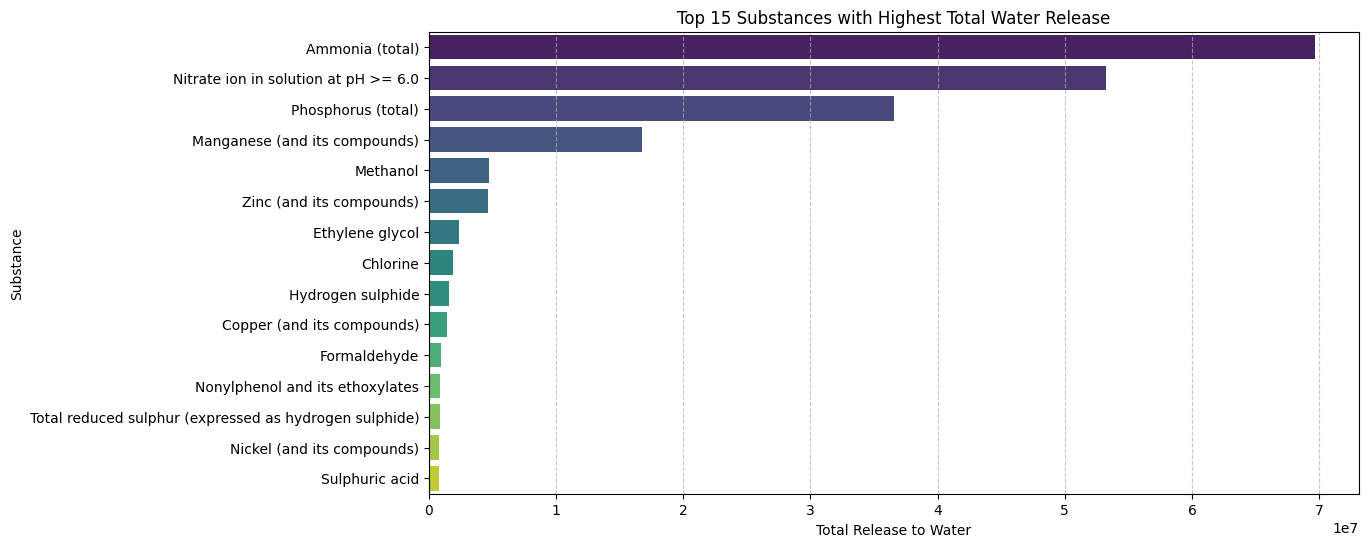

In [ ]:
top_substances = df.groupby("Substance Name (English)")['Total Release to Water'].sum().nlargest(15)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_substances.values, y=top_substances.index, palette="viridis")
plt.title("Top 15 Substances with Highest Total Water Release")
plt.xlabel("Total Release to Water")
plt.ylabel("Substance")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

This line chart shows the trend of the top 5 substances released into water over time. Key observations:

Ammonia (blue) has been the highest pollutant but is slowly decreasing in recent years.
Nitrate ion (red) had a sharp rise around 2000 and has remained stable.
Phosphorus (purple) remains steady with minor fluctuations.
Manganese (orange) and Methanol (green) show relatively stable trends with slight variations.
Relevance to Your Problem:
Helps predict future trends for water pollutants, aligning with your goal of forecasting reductions over the next five years.
Identifies substances with potential decreases, useful for classification modeling.
Supports province-level analysis by linking trends to industrial activity and regulations.

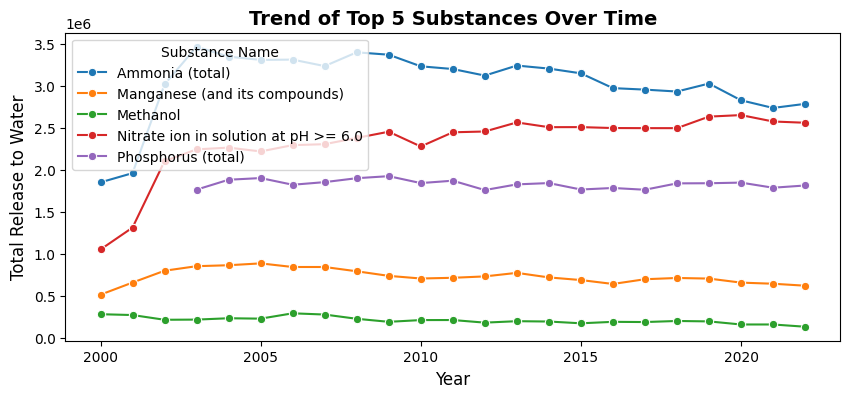

In [ ]:
top_substances = df.groupby('Substance Name (English)')['Total Release to Water'].sum().nlargest(5).index
trend_data = df[df['Substance Name (English)'].isin(top_substances)]
trend_data = trend_data.groupby(['Reporting_Year', 'Substance Name (English)'])['Total Release to Water'].sum().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=trend_data, x='Reporting_Year', y='Total Release to Water', hue='Substance Name (English)', marker='o')
plt.title("Trend of Top 5 Substances Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Release to Water", fontsize=12)
plt.legend(title="Substance Name")
plt.show()


Shows the most common pollutants released into water.
Ammonia (38.5%) and Nitrate ions (29.4%) are the largest contributors.
Phosphorus (20.2%) and Manganese (9.3%) also have notable shares.
Methanol (2.6%) is the least common.
Relevance: Helps identify key pollutants for predicting future reductions and assessing which industries contribute the most to water contamination. This is crucial for targeted environmental policies and emission control strategies.

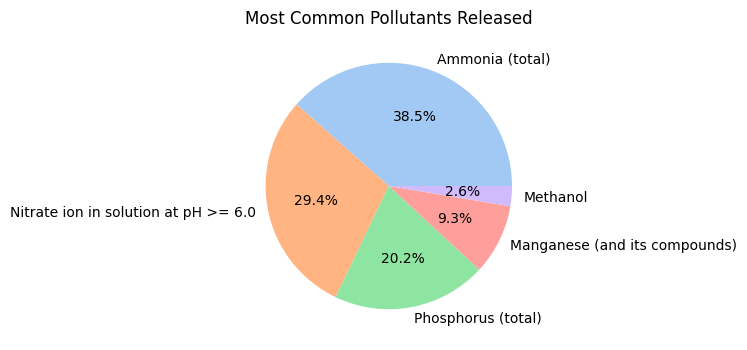

In [ ]:
# Group by pollutant and sum emissions
top_pollutants = df.groupby('Substance Name (English)')['Total Release to Water'].sum().reset_index()

# Get the top 5
top_pollutants = top_pollutants.sort_values(by='Total Release to Water', ascending=False).head(5)

# Plot
plt.figure(figsize=(4,4))
plt.pie(top_pollutants['Total Release to Water'], labels=top_pollutants['Substance Name (English)'], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Most Common Pollutants Released")
plt.show()
